# Analiza ponudbe stanovanj v Ljubljani

V projektni nalogi bom analizirala ponudbo stanovanj v Ljubljani.

## Pridobivanje podatkov

Tabela o ponudbi stanovanj se nahaja v *obdelani_podatki/stanovanja.csv*. Podatke sem pridobila s spletne strani https://www.nepremicnine.net/oglasi-prodaja/ljubljana-mesto/stanovanje/. Regularni izrazi in koda, s katero sem izluščila podatke, so zapisani v datoteki *uvoz_podatkov.py*.

Za vsako stanovanje sem pridobila naslednje podatke:
- id stanovanja,
- območje
- tip stanovanja,
- leto gradnje,
- leto adaptacije,
- nadstropje,
- velikost stanovanja,
- ceno,
- agencijo, ki stanovanje ponuja,
- kratek opis stanovanja.

## Hipoteze

S pomočjo urejenih podatkov bom poskušali analizirati:
- na katerih območjih je ponudba največja?
- kje so najdražja/najcenejša stanovanja?
- ali leto gradnje vpliva na ceno?
- ali se cena stanovanja res povečuje z velikostjo?
- ali so adaptirana stanovanja dražja?
- katera agencija ima v lasti največ ponudb?
...


## Analiza podatkov

In [75]:
# naložimo paket pandas
import pandas as pd

# vključimo risanje grafov
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
stanovanja = pd.read_csv('obdelani_podatki/stanovanja.csv', index_col='id')

# ponazorimo podatke
stanovanja

,obmocje,tip,leto,adaptirano,nadstropje,velikost,cena,agencija,opis
id,,,,,,,,,
6204808,BS 3,trisobno,1978,2017.0,4,73.50,199900.00,Studio 68 d.o.o.,"73,5 m2, 3-sobno, penthouse, zgrajeno l. 1978,..."
6219729,ČRNUČE,enosobno,1975,NaN,2,40.90,106000.00,MKA nepremičnine d.o.o.,"40,9 m2, 1-sobno, zgrajeno l. 1975, 2/5 nad., ..."
6207003,DOLGI MOST,garsonjera,2003,NaN,P,30.00,111500.00,Mreža nepremičnin d.o.o.,"30 m2, garsonjera, zgrajena l. 2003, P/2 nad.,..."
6219793,LJ. BEŽIGRAD,štirisobno,1992,NaN,None,123.23,437000.00,"STAN nepremičnine d.o.o., Ljubljana","123,23 m2, 4-sobno, zgrajeno l. 1992, Za vas p..."
6217083,LJ. CENTER,trisobno,1929,NaN,None,76.03,247000.00,"STAN nepremičnine d.o.o., Ljubljana","76,03 m2, 3-sobno, zgrajeno l. 1929, Si želite..."
6190628,LJ. CENTER,štirisobno,2019,NaN,P,137.28,654620.00,"Stoja trade, d.o.o., Ljubljana","137,28 m2, 4-sobno, zgrajeno l. 2019, 76 m2 ze..."
6102974,LJ. CENTER,petsobno,2017,NaN,M,220.00,770000.00,Hiša Invest d.o.o.,"220 m2, 5 in večsobno, penthouse, zgrajeno l. ..."
6112172,LJ. CENTER,štiriinpolsobno,1937,2015.0,1,173.60,550000.00,Harmonija nepremičnine Ksenja Kokalj s.p.,"173,6 m2, 4,5-sobno, zgrajeno l. 1937, adaptir..."
6172073,LJ. CENTER,trisobno,2009,NaN,P,115.30,268000.00,AJT d.o.o.,"115,3 m2, 3-sobno, zgrajeno l. 2009, pritličje..."


### Ponudba in povprečna cena kvadratnega metra glede na območje

Poglejmo koliko ponudb stanovanj imamo v katerem delu Ljubljane.

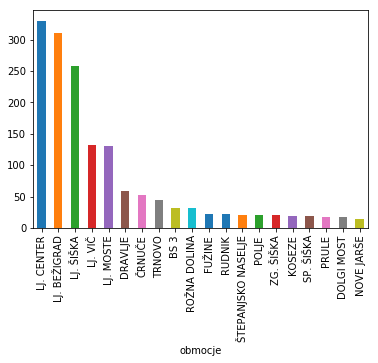

In [76]:
stanovanja.groupby('obmocje').size().sort_values(ascending=False)[:20].plot.bar()
# ponazorimo samo prvih 20 zaradi preglednosti

Presenetljivo je, da je največja ponudba stanovanj v območju Ljubljana Center. Podatke o območju smo pridobili iz naslova oglasa, zato je možno, da prodajalci pod območje Ljubljana Center, zajemajo večjo površino Ljubljane, da je oglas bolj privlačen za kupce.

Na katerem območju so stanovanja najcenejša in na katerem najdražja?

Ustvarimo nov stolpec _$cena/m^2$_ v razpredelnici _stanovanja_, da bomo lahko ustrezno primerjali cene.

In [77]:
stanovanja['cena/m^2'] = (stanovanja['cena']/stanovanja['velikost']).round(2)
stanovanja.head(5)

,obmocje,tip,leto,adaptirano,nadstropje,velikost,cena,agencija,opis,cena/m^2
id,,,,,,,,,,
6204808,BS 3,trisobno,1978,2017.0,4,73.50,199900.0,Studio 68 d.o.o.,"73,5 m2, 3-sobno, penthouse, zgrajeno l. 1978,...",2719.73
6219729,ČRNUČE,enosobno,1975,NaN,2,40.90,106000.0,MKA nepremičnine d.o.o.,"40,9 m2, 1-sobno, zgrajeno l. 1975, 2/5 nad., ...",2591.69
6207003,DOLGI MOST,garsonjera,2003,NaN,P,30.00,111500.0,Mreža nepremičnin d.o.o.,"30 m2, garsonjera, zgrajena l. 2003, P/2 nad.,...",3716.67
6219793,LJ. BEŽIGRAD,štirisobno,1992,NaN,None,123.23,437000.0,"STAN nepremičnine d.o.o., Ljubljana","123,23 m2, 4-sobno, zgrajeno l. 1992, Za vas p...",3546.21
6217083,LJ. CENTER,trisobno,1929,NaN,None,76.03,247000.0,"STAN nepremičnine d.o.o., Ljubljana","76,03 m2, 3-sobno, zgrajeno l. 1929, Si želite...",3248.72


Gledali bomo samo tista območja za katera je v ponudbi 5 ali več stanovanj, da bo analiza bolj ustrezna.

In [78]:
obmocja_vec_ponudbe = stanovanja.groupby('obmocje').size().sort_values(ascending=False)[:35].index
# če pogledamo vse vidimo, da je prvih 35 takih, ki imajo 5 ali več stanovanj
obmocja_vec_ponudbe

Index(['LJ. CENTER', 'LJ. BEŽIGRAD', 'LJ. ŠIŠKA', 'LJ. VIČ', 'LJ. MOSTE',
       'DRAVLJE', 'ČRNUČE', 'TRNOVO', 'BS 3', 'ROŽNA DOLINA', 'FUŽINE',
       'RUDNIK', 'ŠTEPANJSKO NASELJE', 'POLJE', 'ZG. ŠIŠKA', 'KOSEZE',
       'SP. ŠIŠKA', 'PRULE', 'DOLGI MOST', 'NOVE JARŠE', 'ZALOG',
       'ZUPANČIČEVA JAMA', 'ŠENTVID', 'TACEN', 'PODUTIK', 'VEVČE', 'KODELJEVO',
       'KOLEZIJA', 'SAVSKO NASELJE', 'STARA LJ.', 'STOŽICE', 'BRDO', 'JARŠE',
       'MURGLE', 'SAVLJE'],
      dtype='object', name='obmocje')

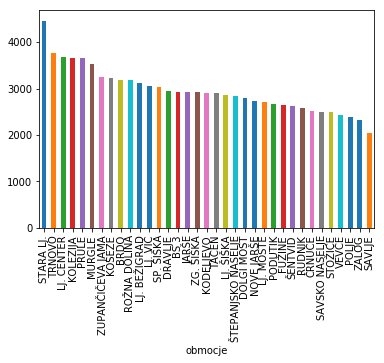

In [79]:
cena_obmocje = stanovanja[stanovanja['obmocje'].isin(obmocja_vec_ponudbe)].groupby('obmocje').mean()['cena/m^2'].sort_values(ascending=False).round(2)
cena_obmocje.plot.bar()

In [80]:
print(cena_obmocje.head(6))
print(cena_obmocje.tail(3))

obmocje
STARA LJ.     4458.11
TRNOVO        3774.19
LJ. CENTER    3669.05
KOLEZIJA      3659.24
PRULE         3651.40
MURGLE        3535.32
Name: cena/m^2, dtype: float64
obmocje
POLJE     2386.64
ZALOG     2316.01
SAVLJE    2042.14
Name: cena/m^2, dtype: float64


Opazimo, da je najdražji kvadratni meter v Stari Ljubljani s 4458.11 € v povprečju, kar ni presenetljivo. Sledi Trnovo, Ljubljana Center, Kolezija, Prule, Murgle itd. Preseneča nas območja Murgle na šestem mestu, saj velja za eno izmed območij z najdražjimi nepremičninami. Eden izmed razlogov je v naših podatkih, saj je v Murglah manj stanovanj v ponudbi kot hiš, ki pa jih v naši analizi ne upoštevamo. Drugi razlog bi lahko bila povečana gradnja novih stanovanj v preteklih letih na območju Trnovo in Prule.
Najnižja cena kvadratnega metra je v Polju, Zalogu in Savljah, kar je tudi predvidljivo, saj so to stanovanja, ki so najbolj oddaljena od središča mesta. Zanimivo je, da cena pade za polovico vrednosti najdražjega kvadratnega metra.

### Cena stanovanj glede na velikost

Zanima nas ali je cena stanovanja višja, če ima stanovanje več kvadratnih metrov. 

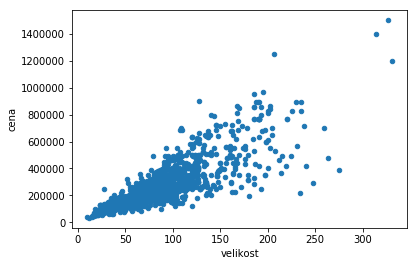

In [81]:
stanovanja.plot.scatter('velikost', 'cena')

Čeprav so podatki zelo heteroskedastični in linearna regresija ni najboljša izbira za korelacijo med spremenljivkami, površno lahko rečemo, da cena res narašča sorazmerno z velikostjo in potrdimo našo hipotezo.

Iz radovednosti poglejmo stanovanje v ponudbi z najdražjim in najcenejšim kvadratnim metrom.

In [82]:
max_cena = stanovanja['cena/m^2'].max()
min_cena = stanovanja['cena/m^2'].min()
print('Najcenejši kvadratni meter: {} €. Najdražji kvadratni meter: {} €.'.format(min_cena, max_cena))

Najcenejši kvadratni meter: 940.17 €. Najdražji kvadratni meter: 9259.26 €.


In [83]:
stanovanja[(stanovanja['cena/m^2'] == min_cena) | (stanovanja['cena/m^2'] == max_cena)]

,obmocje,tip,leto,adaptirano,nadstropje,velikost,cena,agencija,opis,cena/m^2
id,,,,,,,,,,
6219720,LJ. CENTER,garsonjera,1600,NaN,None,27.0,250000.0,ABC nepremičnine d.o.o.,"27 m2, garsonjera, zgrajena l. 1600, prodamo. ...",9259.26
6206314,LJ. ŠIŠKA,petsobno,1982,NaN,2,234.0,220000.0,PAK INVEST d.o.o.,"234 m2, 5 in večsobno, zgrajeno l. 1982, 2/2 n...",940.17


Poglejmo, koliko stane kvadratni meter v povprečju v celotni Ljubljani in mediano.

In [84]:
povprecje = stanovanja['cena/m^2'].mean()
mediana = stanovanja['cena/m^2'].median()
print('Povprečje: {}, Mediana: {}'.format(povprecje, mediana))

Povprečje: 3074.7402774631937, Mediana: 2958.4049999999997


Najdražji kvadratni meter v Ljubljani je kar trikrat večji od povprečne vrednosti. Zanimivo je tudi, da sta vrednosti povprečja in mediane zelo blizu, kar pomeni, da so cene kvadratnega metra za stanovanje v Ljubljani približno enakomerno razporejene od $940$ $€/m^2$ do $9259.26$ $€/m^2$.  

### Cena stanovanj glede na leto gradnje

Preverimo našo hipotezo, da je cena stanovanja odvisna od leta gradnje.

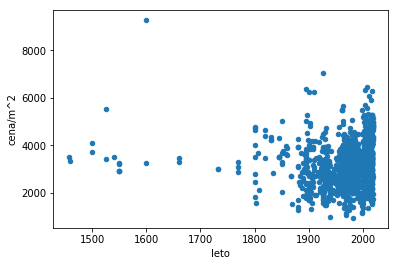

In [85]:
stanovanja.plot.scatter('leto', 'cena/m^2')

Vidimo, da imamo v ponudbi večinoma stanovanja od leta 1900 do leta 2000. Zelo zanimive so pike okoli leta 1500, saj to pomeni, da imamo v ponudbi 500 let stara stanovanja. Poglejmo si nekaj najstarejših stanovanj in njihove cene.

In [86]:
cena_leto = stanovanja[['obmocje','leto', 'cena/m^2']].sort_values(by = 'leto')
cena_leto.head(30)

,obmocje,leto,cena/m^2
id,,,
6221256,LJ. CENTER,1456,3520.83
5610162,LJ. CENTER,1459,3348.84
6195477,LJ. CENTER,1500,3701.34
6195478,LJ. CENTER,1500,4073.58
6219639,LJ. CENTER,1525,5524.48
6039352,LJ. CENTER,1525,3431.37
6214327,LJ. CENTER,1540,3491.23
6220366,LJ. CENTER,1550,2926.83
6218627,LJ. CENTER,1550,3230.77


Naše najstarejše stanovanje je iz leta 1456 in kvadratni meter stane več kot povprečni kvadaratni meter v Ljubljani. Vidimo, da so najstarejša stanovanja v središču Ljubljane in verjetno zaradi svoje starosti in pozicije držijo tako ceno. 

Poglejmo še najnovejša stanovanja v ponudbi in njihove cene.

In [87]:
cena_leto.tail(20)

,obmocje,leto,cena/m^2
id,,,
6211849,LJ. CENTER,2018,4037.42
6218980,LJ. MOSTE,2018,3678.16
6190634,LJ. CENTER,2019,4992.67
6212661,LJ. CENTER,2019,4839.19
6190632,LJ. CENTER,2019,4707.97
6207058,LJ. BEŽIGRAD,2019,4265.08
6207060,LJ. BEŽIGRAD,2019,4211.51
6205983,LJ. BEŽIGRAD,2019,4347.01
6190628,LJ. CENTER,2019,4768.50


In [88]:
povprecna2019 = cena_leto[cena_leto.leto == 2019].mean().round(2)[1]
print('Povprečna cena kvadratnega metra za nove gradnje: {}'.format(povprecna2019))

Povprečna cena kvadratnega metra za nove gradnje: 4271.76


Opazimo, da imamo 18 stanovanj v ponudbi, ki sploh še niso zgrajena in se že prodajajo v povprečju $4271.76$ $€/m^2,$ kar je krepko nad povprečjem.

### Adaptirana stanovanja

In [89]:
adaptirana_stanovanja = stanovanja[stanovanja.adaptirano.notnull()]
neadaptirana_stanovanja = stanovanja[stanovanja.adaptirano.isnull()]
adaptirana_stanovanja

,obmocje,tip,leto,adaptirano,nadstropje,velikost,cena,agencija,opis,cena/m^2
id,,,,,,,,,,
6204808,BS 3,trisobno,1978,2017.0,4,73.50,199900.0,Studio 68 d.o.o.,"73,5 m2, 3-sobno, penthouse, zgrajeno l. 1978,...",2719.73
6112172,LJ. CENTER,štiriinpolsobno,1937,2015.0,1,173.60,550000.0,Harmonija nepremičnine Ksenja Kokalj s.p.,"173,6 m2, 4,5-sobno, zgrajeno l. 1937, adaptir...",3168.20
6209756,LJ. ŠIŠKA,trisobno,2018,2018.0,VP,77.00,259000.0,Zasebna ponudba,"77 m2, 3-sobno, adaptirano l. 2018, VP/4 nad.,...",3363.64
6210276,LJ. ŠIŠKA,petsobno,1974,2014.0,1,168.00,439000.0,Zasebna ponudba,"168 m2, 5 in večsobno, zgrajeno l. 1974, adapt...",2613.10
6220232,POLJE,dvoinpolsobno,1973,2016.0,2,67.00,169000.0,Mreža nepremičnin d.o.o.,"67 m2, 2,5-sobno, zgrajeno l. 1973, adaptirano...",2522.39
6205467,SP. ŠIŠKA,dvoinpolsobno,2003,2003.0,3,76.50,258000.0,"Nepremičninsko posredovanje, Iris Bavdek s.p.","76,5 m2, 2,5-sobno, adaptirano l. 2003, adapti...",3372.55
6217924,BEŽIGRAJSKI DVOR,petsobno,1900,2005.0,1,134.80,285000.0,"C-nep agencija, d.o.o.","134,8 m2, 5 in večsobno, v stavbi zgrajeni l. ...",2114.24
5949151,BEŽIGRAJSKI DVOR,dvosobno,1964,2015.0,4,43.00,190000.0,Zasebna ponudba,"43 m2, 2-sobno, zgrajeno l. 1964, adaptirano l...",4418.60
6190516,BRDO,petsobno,1988,2012.0,2,131.50,356000.0,Garant - Gabrijela Smuk s.p.,"131,5 m2, 5 in večsobno, dupleks, zgrajeno l. ...",2707.22


Od 1766 stanovanj je 905 stanovanj adaptiranih. Podatke o letu prenove, sem vzela iz opisa, tako da je verjetno, da se je kakšen podatek izgubil in je v resnici stanovanje bilo adaptirano, čeprav piše vrednost NaN. To napako zanemarimo.

Poglejmo, ali so cene kvadratnega metra adaptiranih stanovanj višje kot pri neadaptiranih stanovanjih.

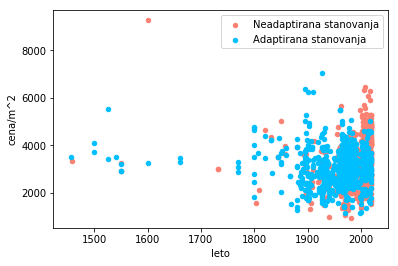

In [90]:
neadaptirana = neadaptirana_stanovanja.plot.scatter(x='leto', y='cena/m^2', color='salmon', label='Neadaptirana stanovanja');

adaptirana_stanovanja.plot.scatter(x='leto', y='cena/m^2', color='deepskyblue', label='Adaptirana stanovanja', ax=neadaptirana);

Vidimo, da je velika večina starih stanovanj bila adaptirana in tudi veliko stanovanj v 20. stoletju. Zanimivo je tudi, da je bilo veliko ne tako starih(od leta 2000 naprej) stanovanj adaptiranih. Neke razlike v ceni adaptiranih in neadaptiranih pa ne moremo opaziti.

### Ponudniki stanovanj

In [91]:
agencije = stanovanja.groupby('agencija').size().sort_values(ascending=False)
agencije

agencija
Zasebna ponudba                                                       265
MESTO NEPREMIČNIN d.o.o.                                              111
LJUBLJANA NEPREMIČNINE d.o.o.                                         110
Stoja trade, d.o.o., Ljubljana                                        101
Mreža nepremičnin d.o.o.                                               83
KREATIVDOM d.o.o.                                                      67
Rocco nepremičnine d.o.o.                                              50
ABC nepremičnine d.o.o.                                                44
Rojal invest d.o.o.                                                    44
STAN nepremičnine d.o.o., Ljubljana                                    40
Nepremičninska družba d.o.o., PE RE/MAX Vogal                          37
Casa 69 d.o.o.                                                         32
Aeon nepremičnine, d.o.o., Century 21 Emona                            26
Lares nepremičninska družba d

[Text(0, 0.5, '')]

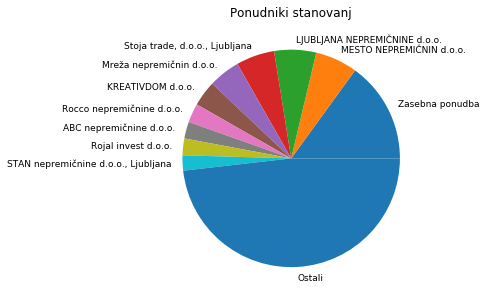

In [92]:
glavne_agencije = agencije.head(10)
glavne_agencije.loc['Ostali']= sum(agencije[-210:])
glavne_agencije.plot.pie(figsize=(9, 5), fontsize=9, title = 'Ponudniki stanovanj').set(ylabel = '')

Imamo 220 različnih ponudnikov stanovanj v Ljubljani. Presenetljivo je največ zasebnih ponudb. Na tortnem diagramu lahko vidimo, da dobro polovico ponudb imajo v lasti zasebni ponudniki in 9 najmočnejših nepremičninskih agencij, slaba polovica ponudb pa se razporedi med ostalih 210 agencij. Te številke dokazujejo prevlado glavnih nepremičninskih agencij, kot so Mesto nepremičnin d.o.o., Ljubljana nepremičnine d.o.o. in Stoja trade d.o.o., nad ostalimi agencijami. 

Zanimivo je še pogledati, kateri ponudnik ponuja stanovanja z najdražjim kvadratnim metrom v povprečju. 

In [93]:
cena_agencija = stanovanja.groupby('agencija').mean().round(2)['cena/m^2']
cena_agencija.sort_values(ascending = False)

agencija
Bamba nepremičnine, Tanko Franc s.p.                                                 5502.85
Oridom nepremičnine, Ivan Orešnik s.p.                                               5439.80
Galeno d.o.o.                                                                        5121.29
Feniks nepremičnine d.o.o.                                                           4567.98
ETAŽA nepremičnine, Tomaž Lenart s.p.                                                4257.64
Eko srebrna hiša d.o.o.                                                              4215.70
MP PROJEKT, d.o.o., PE Ljubljana                                                     4194.26
CIMER, MAKSIMILJAN REMIC s.p.                                                        4189.51
Lobodas, posredništvo in storitve d.o.o.                                             4156.93
Gradina d.o.o.                                                                       4057.32
Blok d.o.o.                                                  

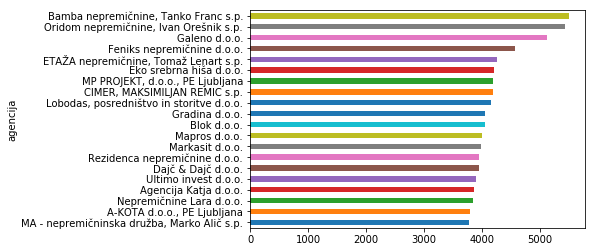

In [94]:
cena_agencija.sort_values()[-20:].plot.barh()

Opazimo, da med najdražjimi ni zgoraj omenjenih prevladajočih agencij. Možna razlaga je, da agencije z manj nepremičnin, raje sprejemajo stanovanja z višjo ceno za kvadratni meter kot prevladajoče agencije, da lahko z njimi naenkrat več zaslužijo. Agencijam z veliko nepremičnin pa ni potrebno toliko zaslužiti pri vsaki nepremičnini, da bi bil končni zaslužek velik. Poglejmo si, koliko nepremičnin imajo agencije, ki ponujajo stanovanja z najdražjim kvadratnim metrom v povprečju.

In [95]:
najdrazje_agencije = cena_agencija.sort_values(ascending = False)[:20].index
stanovanja[stanovanja['agencija'].isin(najdrazje_agencije)].groupby('agencija').size()

agencija
A-KOTA d.o.o., PE Ljubljana                    2
Agencija Katja d.o.o.                          9
Bamba nepremičnine, Tanko Franc s.p.           1
Blok d.o.o.                                    2
CIMER, MAKSIMILJAN REMIC s.p.                  3
Dajč & Dajč d.o.o.                             1
ETAŽA nepremičnine, Tomaž Lenart s.p.          1
Eko srebrna hiša d.o.o.                        4
Feniks nepremičnine d.o.o.                     2
Galeno d.o.o.                                  1
Gradina d.o.o.                                 2
Lobodas, posredništvo in storitve d.o.o.       1
MA - nepremičninska družba, Marko Alič s.p.    2
MP PROJEKT, d.o.o., PE Ljubljana               2
Mapros d.o.o.                                  1
Markasit d.o.o.                                1
Nepremičnine Lara d.o.o.                       1
Oridom nepremičnine, Ivan Orešnik s.p.         2
Rezidenca nepremičnine d.o.o.                  1
Ultimo invest d.o.o.                           1
dtype: int6

To potrdi našo razlago. Poglejmo si razsevni diagram.

In [96]:
cena_agencija = pd.DataFrame(cena_agencija)
stevilo_ponudb = pd.DataFrame(stanovanja.groupby('agencija').size())
stevilo_ponudb.columns = ['st.ponudb']
# združimo tabeli
agencije = pd.merge(cena_agencija, stevilo_ponudb, on = 'agencija')
agencije

,cena/m^2,st.ponudb
agencija,,
AJT d.o.o.,2324.37,1
"24-ur.eu, Dean Daraboš s.p.",3444.20,3
"A-KOTA d.o.o., PE Ljubljana",3800.17,2
ABA d.o.o.,2755.38,4
ABC nepremičnine d.o.o.,3172.21,44
ALEA nepremičninska družba d.o.o.,2606.73,7
ALFA-INT nepremičnine d.o.o.,2974.68,1
"ALTERA, d.o.o.",2773.37,6
APOLONIJ nepremičnine d.o.o.,2063.87,3


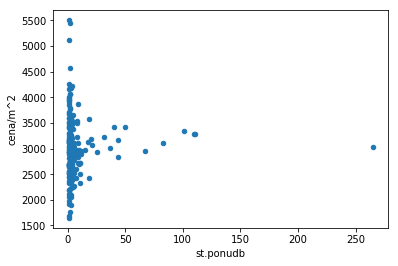

In [97]:
agencije.plot.scatter('st.ponudb', 'cena/m^2')

Vse agencije, ki imajo malo več ponudb imajo ceno za kvadratni meter v razponu od 3000 do 4000 €, saj delajo na količino in jim ni potrebno veliko zaslužiti pri vsaki nepremičnini. Agencije, ki imajo malo ponudb, pa imajo ali zelo visoke cene zaradi prej omenjenih razlogov ali pa sledijo konkurenci, da bi vsaj kaj zaslužili.

## Ugotovitve

Ugotovili smo, da imamo v ponudbi največ stanovanj, ki se nahajajo v središču Ljubljane. Najdražja stanovanj so v Stari Ljubljani, na Trnovem in na območju Ljubljana Center, najcenejša pa v Polju, Zalogu in Savljah. Najcenejši kvadratni meter v ponudbi stane 940.17 €, najdražji kvadratni meter pa 9259.26 €. V povprečju bomo za kvadratni meter v Ljubljani zapravili 3074.74 €. Cena stanovanja narašča z velikostjo, kar je potrdilo našo hipotezo. <br />
Najstarejše stanovanje v ponudbi je iz leta 1456, najnovejša stanovanja pa sploh še niso zgrajena in se prodajajo po ceni 4271.76 € na kvadratni meter, kar je krepko nad povprečjem. Več kot polovica stanovanj v ponudbi je adaptirana, ampak neke razlike v ceni med adaptiranimi in neadaptiranimi ni opaziti. <br />
V naših podatkih imamo 220 različnih ponudnikov stanovanj. Prevladujejo ponudbe z zasebnimi ponudniki in glavne nepremičninske agencije: Mesto nepremičnin d.o.o., Ljubljana nepremičnine d.o.o. in Stoja trade d.o.o..